# Task 1: Data Exploration and Processing

## Part 1: Explore your specific dataset
by calculating basic statistics number of samples and number of samples per class: is your dataset balanced? min / avg / max length of text reading through 100+ samples: noteworthy style, vocabulary, idioms.

### Imports

In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np

from utils.task1_utils import plot_class_distribution



/storage/homefs/kw24z021/miniconda3/envs/task3-nlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load Data

In [2]:
def load_medical_dataset(dataset_name="argilla/medical-domain", split=None):
    """
    Loads the dataset

    Parameters:
        dataset_name (string): Defaults to medical-domain dataset from Hugging Face*

    Returns:
        Dataset (if split is not None) or DatasetDict (split is None)
    """
    try:
        # Load the dataset
        dataset = load_dataset(dataset_name, split=split)
        print("Dataset loaded successfully!")
        print(f"Available splits: {list(dataset.keys())}")
        
        return dataset
    
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None
    

In [3]:
dataset = load_medical_dataset()


Dataset loaded successfully!
Available splits: ['train']


### Data Visualization/Analysis

In [4]:
def analyze_dataset_statistics(dataset):
    """
    Analyze the length of text and distribution of samples across different classes in the dataset
    """
    for split_name, split_data in dataset.items():
        
        # Display number of samples
        print(f"\nNumber of samples: {len(split_data)}")
        print(f"\tFeatures: {list(split_data.features.keys())}")
        #print(f"  First sample: {split_data[1]}")
        if len(split_data) > 0:
            # Calculate Min, Avg, Max length of text
            text_lengths = [len(sample['text']) for sample in split_data if 'text' in sample]
            if text_lengths:
                min_length = min(text_lengths)
                avg_length = sum(text_lengths) / len(text_lengths)
                max_length = max(text_lengths)
                print(f"\tText length:\n\t\tMin: {min_length}\n\t\tAvg: {avg_length:.2f}\n\t\tMax: {max_length}")
        
        print("\nAnalyzing class distribution:")
        # Count samples per class
        class_counts = {}
        total_samples = len(split_data)
        
        for sample in split_data:
            if 'prediction' in sample and isinstance(sample['prediction'], list):
                for label in sample['prediction']:
                    if 'label' in label:
                        prediction = label['label']
                        class_counts[prediction] = class_counts.get(prediction, 0) + 1
        
        # Display results
        if class_counts:
            print("\nClass distribution:")
            for class_name, count in class_counts.items():
                percentage = (count / total_samples) * 100
                print(f"\t{class_name}: {count} samples ({percentage:.2f}%)")
        else:
            print("No prediction labels found in this split")

if dataset:
    analyze_dataset_statistics(dataset)


Number of samples: 4966
	Features: ['text', 'inputs', 'prediction', 'prediction_agent', 'annotation', 'annotation_agent', 'multi_label', 'explanation', 'id', 'metadata', 'status', 'event_timestamp', 'metrics']


	Text length:
		Min: 11
		Avg: 3052.31
		Max: 18425

Analyzing class distribution:

Class distribution:
	 Gastroenterology: 224 samples (4.51%)
	 Surgery: 1088 samples (21.91%)
	 Radiology: 273 samples (5.50%)
	 SOAP / Chart / Progress Notes: 166 samples (3.34%)
	 Letters: 23 samples (0.46%)
	 Lab Medicine - Pathology: 8 samples (0.16%)
	 Consult - History and Phy.: 516 samples (10.39%)
	 Podiatry: 47 samples (0.95%)
	 General Medicine: 259 samples (5.22%)
	 Psychiatry / Psychology: 53 samples (1.07%)
	 Cardiovascular / Pulmonary: 371 samples (7.47%)
	 Urology: 156 samples (3.14%)
	 Ophthalmology: 83 samples (1.67%)
	 Physical Medicine - Rehab: 21 samples (0.42%)
	 Neurology: 223 samples (4.49%)
	 Autopsy: 8 samples (0.16%)
	 Orthopedic: 355 samples (7.15%)
	 Hematology - Oncology: 90 samples (1.81%)
	 Allergy / Immunology: 7 samples (0.14%)
	 Pediatrics - Neonatal: 70 samples (1.41%)
	 Dentistry: 27 samples (0.54%)
	 Neurosurgery: 94 samples (1.89%)
	 Pain Management: 61 samples (1.23

In [5]:
texts = dataset['train']['text']
labels = dataset['train']['prediction']
# Load into a DataFrame for easier handling
df = pd.DataFrame({
    "text": texts,
    "label": labels
})

df['label'].head(10).tolist()

[[{'label': ' Gastroenterology', 'score': 1.0}],
 [{'label': ' Surgery', 'score': 1.0}],
 [{'label': ' Radiology', 'score': 1.0}],
 [{'label': ' Surgery', 'score': 1.0}],
 [{'label': ' SOAP / Chart / Progress Notes', 'score': 1.0}],
 [{'label': ' Letters', 'score': 1.0}],
 [{'label': ' Surgery', 'score': 1.0}],
 [{'label': ' Radiology', 'score': 1.0}],
 [{'label': ' Lab Medicine - Pathology', 'score': 1.0}],
 [{'label': ' Surgery', 'score': 1.0}]]

In [6]:
def extract_label(prediction_list):
    """
    """
    if isinstance(prediction_list, list) and len(prediction_list) > 0:
        item = prediction_list[0]
        if isinstance(item, dict) and 'label' in item:
            return item['label'].strip()  # remove space
    return None

df = pd.DataFrame({
    "text": texts,
    "label": [extract_label(p) for p in labels]
})
df['label'].head(10).tolist()

['Gastroenterology',
 'Surgery',
 'Radiology',
 'Surgery',
 'SOAP / Chart / Progress Notes',
 'Letters',
 'Surgery',
 'Radiology',
 'Lab Medicine - Pathology',
 'Surgery']

Total samples: 4966
Unique labels: 40

Samples per class:
label
Surgery                          1088
Consult - History and Phy.        516
Cardiovascular / Pulmonary        371
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  224
Neurology                         223
SOAP / Chart / Progress Notes     166
Urology                           156
Obstetrics / Gynecology           155
Discharge Summary                 108
ENT - Otolaryngology               96
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    61
Psychiatry / Psychology            53
Office Notes                       50
Podiatry                           47
Dermatology                        29
Cosmetic / Plastic Surge

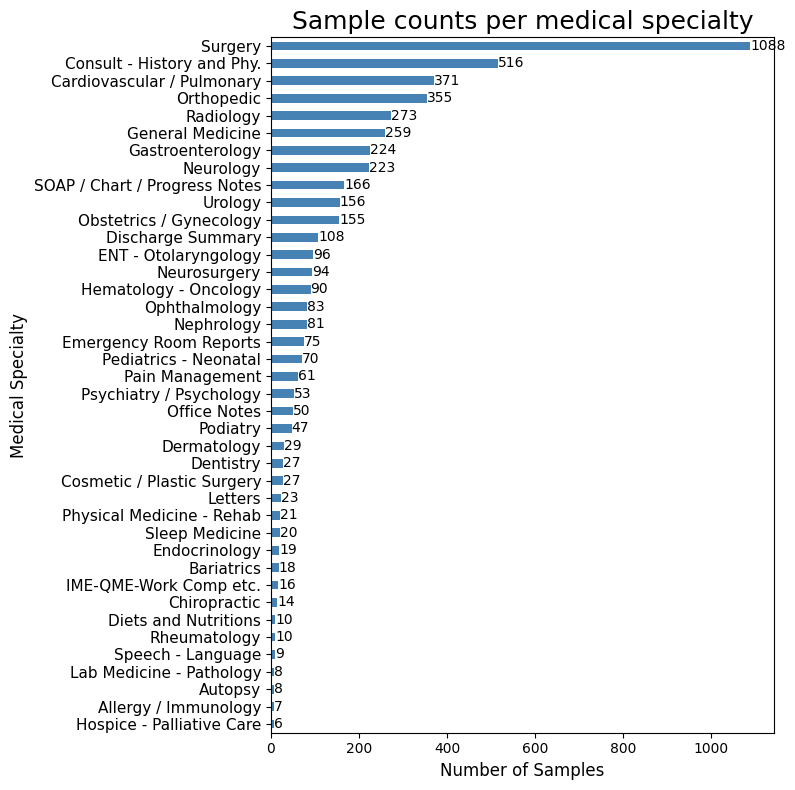

In [7]:

# --- 1. Basic info ---
print(f"Total samples: {len(df)}")
print(f"Unique labels: {df['label'].nunique()}")

# Count per class
label_counts = df['label'].value_counts()
print("\nSamples per class:")
print(label_counts)

# Check balance
print("\nDataset balance:")
print((label_counts / len(df) * 100).round(2))


plot_class_distribution(label_counts)


In [8]:
# --- 2. Text length statistics ---
df['length'] = df['text'].apply(lambda x: len(str(x).split()))

print("\nText length statistics:")
print(f"Min: {df['length'].min()}")
print(f"Avg: {df['length'].mean():.2f}")
print(f"Max: {df['length'].max()}")



Text length statistics:
Min: 1
Avg: 465.45
Max: 3029


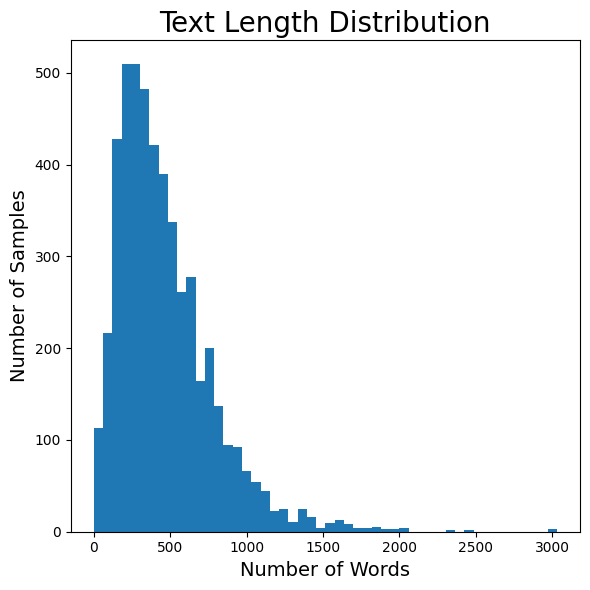

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.hist(df['length'], bins=50)

plt.title("Text Length Distribution", fontsize=20)
plt.xlabel("Number of Words", fontsize=14)
plt.ylabel("Number of Samples", fontsize=14)

plt.tight_layout()
plt.show()


In [10]:

# --- 3. Example inspection ---

# number of examples per class (adjust if needed)
examples_per_class = 3

# loop over each unique label
for label_name in sorted(df['label'].dropna().unique()):
    print(f"\n{'='*20} {label_name} {'='*20}")
    subset = df[df['label'] == label_name]
    
    # sample up to 'examples_per_class' texts from this class
    sample_texts = subset['text'].sample(min(len(subset), examples_per_class), random_state=42)
    
    for i, text in enumerate(sample_texts, start=1):
        # shorten text and replace newlines for readability
        preview = str(text).replace('\n', ' ')[:400]
        print(f"\nExample {i}:\n{preview} ...")




==================== Allergy / Immunology ====================

Example 1:
HISTORY:,  I had the pleasure of meeting and evaluating the patient referred today for evaluation and treatment of chronic sinusitis.  As you are well aware, she is a pleasant 50-year-old female who states she started having severe sinusitis about two to three months ago with facial discomfort, nasal congestion, eye pain, and postnasal drip symptoms.  She states she really has sinus problems, but  ...

Example 2:
SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not ...

Example 3:
HISTORY: , A 34-year-old male presents today self-referred at the recommendation of Emerge

### **Several characteristics of the dataset**:

The **highly imbalanced** dataset contains diverse clinical reports with structured templates and domain-specific terminology.  
The preprocessing pipeline should be designed to balance **noise reduction** with preservation of **clinically informative details**.

- **Preserve short clinical abbreviations** (e.g., *BP, HR, CT, MRI, COPD, MI*) that are semantically rich.  
  → Avoid aggressive short-token filtering to retain diagnostic and procedural meaning.

- **Retain quantitative expressions and measurements** (e.g.,  *L4–L5 disc*).  
  → Numeric tokens may need to be kept as they often indicate dosage, anatomical levels, or severity.

- **Remove repetitive clinical boilerplate** (e.g., *HISTORY*, *PROCEDURE*).  
  → An extended MEDICAL_STOPWORDS list should be there to filter non-discriminative template headers or any phrases common to all specialties.

- **Normalize medical vocabulary through lemmatization.**  
  → Lemmatization should be applied to improve TF-IDF consistency.

- **Handle mixed structured and free-text content.**  
  → Apply lowercasing and symbol cleaning, while preserving key medical units, abbreviations, and bigrams for semantic clustering.

Overall, the preprocessing in next step should aim to **reduce template redundancy** while **preserving abbreviations, measurements, and procedural terms** that define specialty-specific patterns.  



## Part 2 Establish a structured and flexible (configurable) processing pipeline 
with steps for reading documents from file tokenizing normalizing (lowercase, lemmatize/stem, …) filtering (stop words, …)
Use the script clustering.py as a template for clustering your text

In [11]:
# Load imports
from utils.task1_utils import   plot_crosstab, plot_cluster_sizes, top_terms_per_cluster, plot_two_metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans 
from sklearn.metrics import ( silhouette_score, 
                              homogeneity_completeness_v_measure, 
                              adjusted_rand_score, )
from tqdm.auto import tqdm
import pandas as pd
import spacy
import re

### P1. Data Cleaning Decisions


The cleaning decision based on the information above is to

- Remove entries where the text length is < 40 chars

In [12]:
# Visualising entries where text contains < n chars

n_chars = 40 # tried and this is the highest n that doesn't include entries with meaningful text
def get_short_text_idx(df):
    short_idx = [i for i, t in enumerate(df['text']) if len(t) < n_chars]
    short_df = df.loc[short_idx, ['label', 'text']]
    print(short_df.to_string(index=True))
    return short_idx
short_text_idx = get_short_text_idx(df)
print("Initial lenth: ", len(df))
df = df.drop(index=short_text_idx)
print("Removed length: ", len(short_text_idx))
print("New length: ", len(df))

                              label                     text
14                 General Medicine             SUBJECTIVE:,
613                    Chiropractic  REASON FOR EVALUATION:,
1181                      Radiology            INDICATIONS:,
1381                     Orthopedic  REASON FOR EVALUATION:,
1415                   Office Notes        CHIEF COMPLAINT:,
1638                Pain Management              OPERATION:,
1715                        Surgery           INDICATION:  ,
1784                   Office Notes      CHIEF COMPLAINT:  ,
2493                        Urology        CHIEF COMPLAINT:,
2791     Consult - History and Phy.        CHIEF COMPLAINT:,
3205               Gastroenterology           INDICATION:  ,
3849     Cardiovascular / Pulmonary            INDICATIONS:,
3886  SOAP / Chart / Progress Notes             SUBJECTIVE:,
4160                     Orthopedic        CHIEF COMPLAINT:,
4371                     Orthopedic      CHIEF COMPLAINT:  ,
4933                Pain

### P2. Stopwords Filtering

- Add dataset-specific stopwords to be filtered out

In [13]:
def get_specific_stopwords(df, min_stopword_len=5):
    caps = []
    word = ''
    def _find_cap(s):
        for ele in str(s):
            if ord(ele) < 65 or ord(ele) > 90:
                return 0
        return 1
    texts = df['text']
    for text in texts: 
        for char in text:
            if _find_cap(char):
                word += char
            elif len(word) > 0:
                if char == ':': # stop if the word has : at the end
                    caps.append(word)
                    word = ''
                elif char == ' ' and word[-1] != ' ': # continue if there is a space detected but not 2 in a row
                    word += char
                elif len(word) >= min_stopword_len: # final char is neither caps nor :, maybe >1 space in a row
                    word = word[:-1] if word[-1] == ' ' else word
                    caps.append(word)
                    word = ''
                else: # 2 spaces in a row and length < min_stopword_len
                    word = ''
    return caps

In [14]:
capital_words = get_specific_stopwords(df, min_stopword_len=6)
unique_terms, counts = np.unique(capital_words, return_counts=True)
result = np.vstack((unique_terms, counts)).T
result = result[np.argsort(-counts.astype(int), kind="stable")]

for i in range(len(result)):
    print(f"{i}. {result[i,:]}" )

0. ['ANESTHESIA' '1307']
1. ['PROCEDURE' '1300']
2. ['PREOPERATIVE DIAGNOSIS' '1171']
3. ['POSTOPERATIVE DIAGNOSIS' '1087']
4. ['PHYSICAL EXAMINATION' '992']
5. ['HISTORY OF PRESENT ILLNESS' '954']
6. ['IMPRESSION' '945']
7. ['HEENT' '889']
8. ['ALLERGIES' '874']
9. ['PAST MEDICAL HISTORY' '843']
10. ['REVIEW OF SYSTEMS' '787']
11. ['SOCIAL HISTORY' '787']
12. ['PLAN' '780']
13. ['COMPLICATIONS' '753']
14. ['MEDICATIONS' '726']
15. ['FINDINGS' '678']
16. ['FAMILY HISTORY' '642']
17. ['ESTIMATED BLOOD LOSS' '607']
18. ['VITAL SIGNS' '605']
19. ['PROCEDURE PERFORMED' '601']
20. ['ABDOMEN' '592']
21. ['POSTOPERATIVE DIAGNOSES' '590']
22. ['GENERAL' '565']
23. ['PREOPERATIVE DIAGNOSES' '546']
24. ['NECK' '517']
25. ['EXTREMITIES' '499']
26. ['ASSESSMENT' '459']
27. ['CHIEF COMPLAINT' '452']
28. ['HISTORY' '418']
29. ['DESCRIPTION OF PROCEDURE' '412']
30. ['LUNGS' '385']
31. ['INDICATIONS' '373']
32. ['PAST SURGICAL HISTORY' '369']
33. ['EXAM' '365']
34. ['CARDIOVASCULAR' '357']
35. ['PROCE

In [15]:
# Store selected stopwords in csv
min_stopword_frequency = 30 # NOTE try changing this value
custom_stopwords = result[result[:, 1].astype(int) >= 30][:, 0]

# Save stopwords to CSV
STOPWORD_PATH = "./Task1/utils_files/custom_stopwords.csv"
pd.DataFrame(custom_stopwords).to_csv(
    STOPWORD_PATH,
    sep=",",
    header=False,
    index=False
)

print(f"Saved {len(custom_stopwords)} custom stopwords to {STOPWORD_PATH}")

Saved 173 custom stopwords to ./Task1/utils_files/custom_stopwords.csv


### P3. Text Processing

- Text Processing (lemmatizing, tokenization, filtering by identified stopwords in custom_stopwords.csv)


In [16]:
# Load custom stopwords from CSV
from utils.preprocessing_enhanced import load_stopwords
STOPWORD_PATH = "./Task1/utils_files/custom_stopwords.csv"
CUSTOM_STOPWORDS = load_stopwords(STOPWORD_PATH)


[preprocessing] Loaded 173 stopwords from ./Task1/utils_files/custom_stopwords.csv


In [17]:
# -------------------------------------
# 3. Preprocessing
# -------------------------------------
from utils.preprocessing_enhanced import preprocess_text

# Three configs
CONFIG_NONE = {
    "enable": False
}

CONFIG_MINIMAL = {
    "enable": True,
    "lowercase": True,
    "lemmatize": True,
    "remove_stopwords": False,
    "remove_numbers": False,
    "keep_short_tokens": False,
    "remove_medical_boilerplate": False,
}

CONFIG_MEDIUM = {
    "enable": True,
    "lowercase": True,
    "lemmatize": False,
    "remove_stopwords": True,
    "remove_numbers": False,
    "keep_short_tokens": False,
    "remove_medical_boilerplate": False,
}


CONFIG_MEDIUM2 = {
    "enable": True,
    "lowercase": True,
    "lemmatize": True,
    "remove_stopwords": True,
    "remove_numbers": False,
    "keep_short_tokens": False,
    "remove_medical_boilerplate": False,
}

CONFIG_FULL = {
    "enable": True,
    "lowercase": True,
    "lemmatize": True,
    "remove_stopwords": True,
    "remove_numbers": True,
    "keep_short_tokens": True,
    "remove_medical_boilerplate": True,
}


# Apply preprocessing

# df = df.head(100) # reduce the sample size to speed up for trials

df["text_none"] = [preprocess_text(t, custom_stopwords=CUSTOM_STOPWORDS, **CONFIG_NONE) for t in tqdm(df["text"], desc="Processing")]
df["text_min"] = [preprocess_text(t, custom_stopwords=CUSTOM_STOPWORDS, **CONFIG_MINIMAL) for t in tqdm(df["text"], desc="Processing")]
df["text_med2"] = [preprocess_text(t, custom_stopwords=CUSTOM_STOPWORDS, **CONFIG_MEDIUM2) for t in tqdm(df["text"], desc="Processing")]
df["text_med"] = [preprocess_text(t, custom_stopwords=CUSTOM_STOPWORDS, **CONFIG_MEDIUM) for t in tqdm(df["text"], desc="Processing")]
df["text_full"] = [preprocess_text(t, custom_stopwords=CUSTOM_STOPWORDS, **CONFIG_FULL) for t in tqdm(df["text"], desc="Processing")]





Processing:   0%|          | 0/4950 [00:00<?, ?it/s]

Processing: 100%|██████████| 4950/4950 [03:05<00:00, 26.62it/s]


In [18]:
df["text_none"][0]

'PREOPERATIVE DIAGNOSIS:,  Iron deficiency anemia.,POSTOPERATIVE DIAGNOSIS:,  Diverticulosis.,PROCEDURE:,  Colonoscopy.,MEDICATIONS: , MAC.,PROCEDURE: , The Olympus pediatric variable colonoscope was introduced into the rectum and advanced carefully through the colon to the cecum identified by the ileocecal valve and the appendiceal orifice.  Preparation was good, although there was some residual material in the cecum that was difficult to clear completely.  The mucosa was normal throughout the colon.  No polyps or other lesions were identified, and no blood was noted.  Some diverticula were seen of the sigmoid colon with no luminal narrowing or evidence of inflammation.  A retroflex view of the anorectal junction showed no hemorrhoids.  The patient tolerated the procedure well and was sent to the recovery room.,FINAL DIAGNOSES:,1.  Diverticulosis in the sigmoid.,2.  Otherwise normal colonoscopy to the cecum.,RECOMMENDATIONS:,1.  Follow up with Dr. X as needed.,2.  Screening colonoscop

In [19]:
df["text_full"][0]

'preoperative     iron deficiency anemia postoperative     diverticulosis     colonoscopy medication     mac     olympus pediatric variable colonoscope introduce rectum advance carefully colon cecum identify ileocecal valve appendiceal orifice    preparation good residual material cecum difficult clear completely    mucosa normal colon    polyp lesion identify blood note    diverticula see sigmoid colon luminal narrowing evidence inflammation    retroflex view anorectal junction show hemorrhoid    patient tolerate send recovery room final       diverticulosis sigmoid       normal colonoscopy cecum       follow dr need       screening colonoscopy    year       additional evaluation cause anemia appropriate'

### P4. Vectorization

In [20]:
# -------------------------------------
# 4. Vectorization
# -------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_vectorize(series):
    tqdm.pandas(desc="Vectorizing TF-IDF")

    vec = TfidfVectorizer(
        max_features=10000, 
        ngram_range=(1,2),
        min_df=2,
    )

    # Convert into list via tqdm
    text_list = list(tqdm(series, desc="Reading text for TF-IDF"))

    X = vec.fit_transform(text_list)
    return X, vec

X_none,  vec_none  = tfidf_vectorize(df["text_none"])
X_min,   vec_min   = tfidf_vectorize(df["text_min"])
X_med,   vec_med   = tfidf_vectorize(df["text_med"])
X_med2,   vec_med2   = tfidf_vectorize(df["text_med2"])
X_full,  vec_full  = tfidf_vectorize(df["text_full"])



Reading text for TF-IDF: 100%|██████████| 4950/4950 [00:00<00:00, 3484108.88it/s]


### P5. Clustering and Evaluation

In [21]:
# -------------------------------------
# 5. KMeans clustering and evaluation
# -------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure, adjusted_rand_score

K_true = df["label"].nunique()
interval = 10
Ks = [K_true - interval, K_true, K_true + interval]

def run_kmeans_experiment(X):
    results = []
    for K in tqdm(Ks):
        km = KMeans(n_clusters=K, n_init=10, random_state=42)
        labels = km.fit_predict(X)

        sil = silhouette_score(X, labels)
        h, c, v = homogeneity_completeness_v_measure(df["label"], labels)
        ari = adjusted_rand_score(df["label"], labels)

        results.append({
            "K": K,
            "silhouette": sil,
            "homogeneity": h,
            "completeness": c,
            "v_measure": v,
            "ARI": ari
        })
        
        # save K = true label count 
        if K == K_true:
            df[f"cluster"] = labels

    return pd.DataFrame(results)

res_none = run_kmeans_experiment(X_none)
res_min  = run_kmeans_experiment(X_min)
res_med  = run_kmeans_experiment(X_med)
res_full = run_kmeans_experiment(X_full)
res_med2= run_kmeans_experiment(X_med2)  # This config's clustering is saved in df, overwriting previous 
  


100%|██████████| 3/3 [00:26<00:00,  8.85s/it]


In [22]:
import os

res_none["config"] = "TFIDF_NONE"
res_min["config"]  = "TFIDF_MINIMAL_PROC"
res_med["config"]  = "TFIDF_MEDIUM_PROC"
res_med2["config"]  = "TFIDF_BEST_PROCESSED"
res_full["config"] = "TFIDF_FULL_PROC"

results_all = pd.concat([res_none, res_min, res_med, res_med2, res_full], ignore_index=True)

save_dir = "Task1/results"
os.makedirs(save_dir, exist_ok=True)

save_path = os.path.join(save_dir, "results_1.csv")
results_all.to_csv(save_path, index=False)
results_all

,K,silhouette,homogeneity,completeness,v_measure,ARI,config
0,30,0.032562,0.318478,0.310960,0.314674,0.111147,TFIDF_NONE
1,40,0.034346,0.346550,0.304422,0.324123,0.074315,TFIDF_NONE
2,50,0.035797,0.369000,0.295223,0.328014,0.070210,TFIDF_NONE
3,30,0.028461,0.319328,0.304071,0.311513,0.087227,TFIDF_MINIMAL_PROC
4,40,0.040103,0.343663,0.314371,0.328365,0.102761,TFIDF_MINIMAL_PROC
5,50,0.045208,0.359222,0.300661,0.327343,0.077131,TFIDF_MINIMAL_PROC
6,30,0.038182,0.357591,0.332754,0.344726,0.093659,TFIDF_MEDIUM_PROC
7,40,0.044082,0.380132,0.329699,0.353124,0.073805,TFIDF_MEDIUM_PROC
8,50,0.048448,0.402034,0.325486,0.359733,0.066895,TFIDF_MEDIUM_PROC
9,30,0.038383,0.340825,0.331099,0.335891,0.087113,TFIDF_BEST_PROCESSED


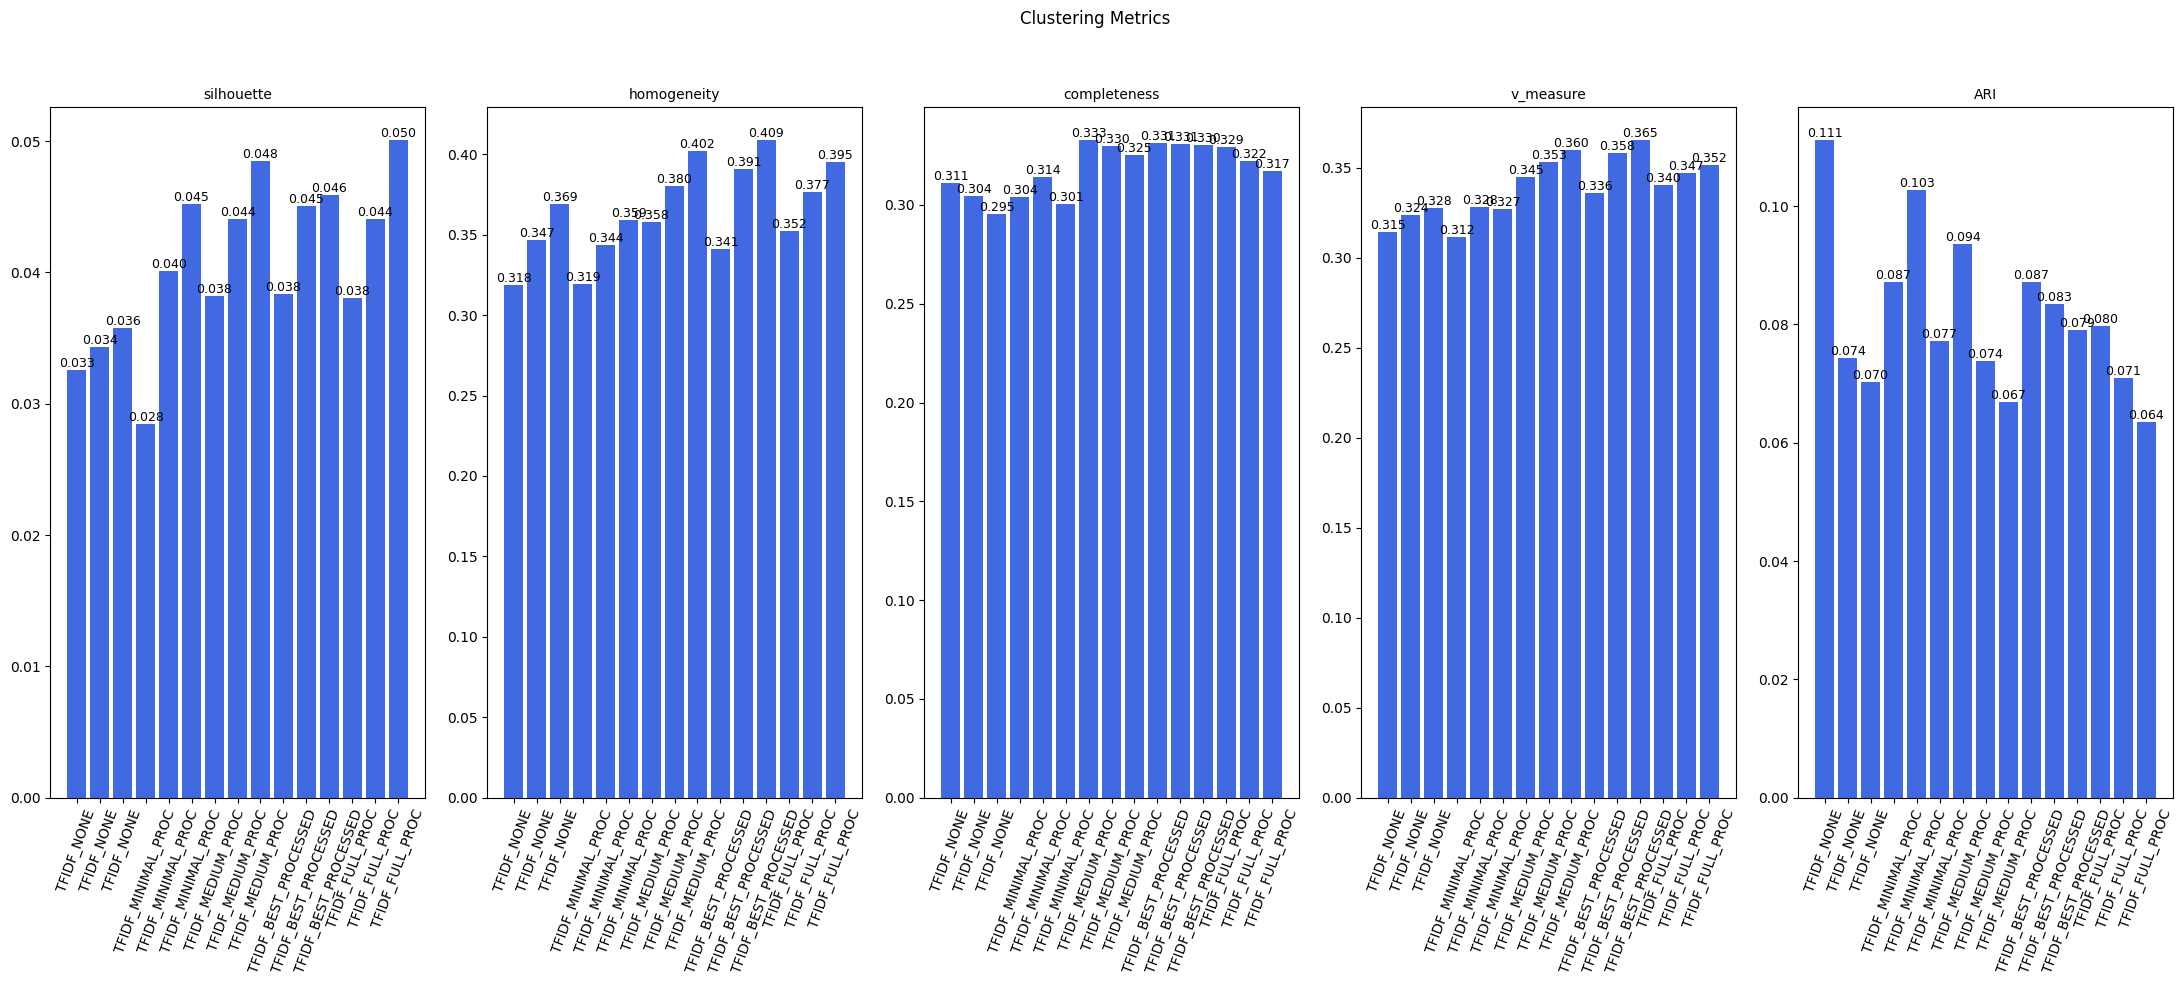

In [23]:
# # -------------------------------------
# # 6. Metric comparison plot
# # -------------------------------------
import matplotlib.pyplot as plt
import numpy as np
from utils.task1_utils import plot_metrics_bar

results_TFIDF = results_all.copy()

plot_metrics_bar(results_TFIDF,figsize=(22, 10))


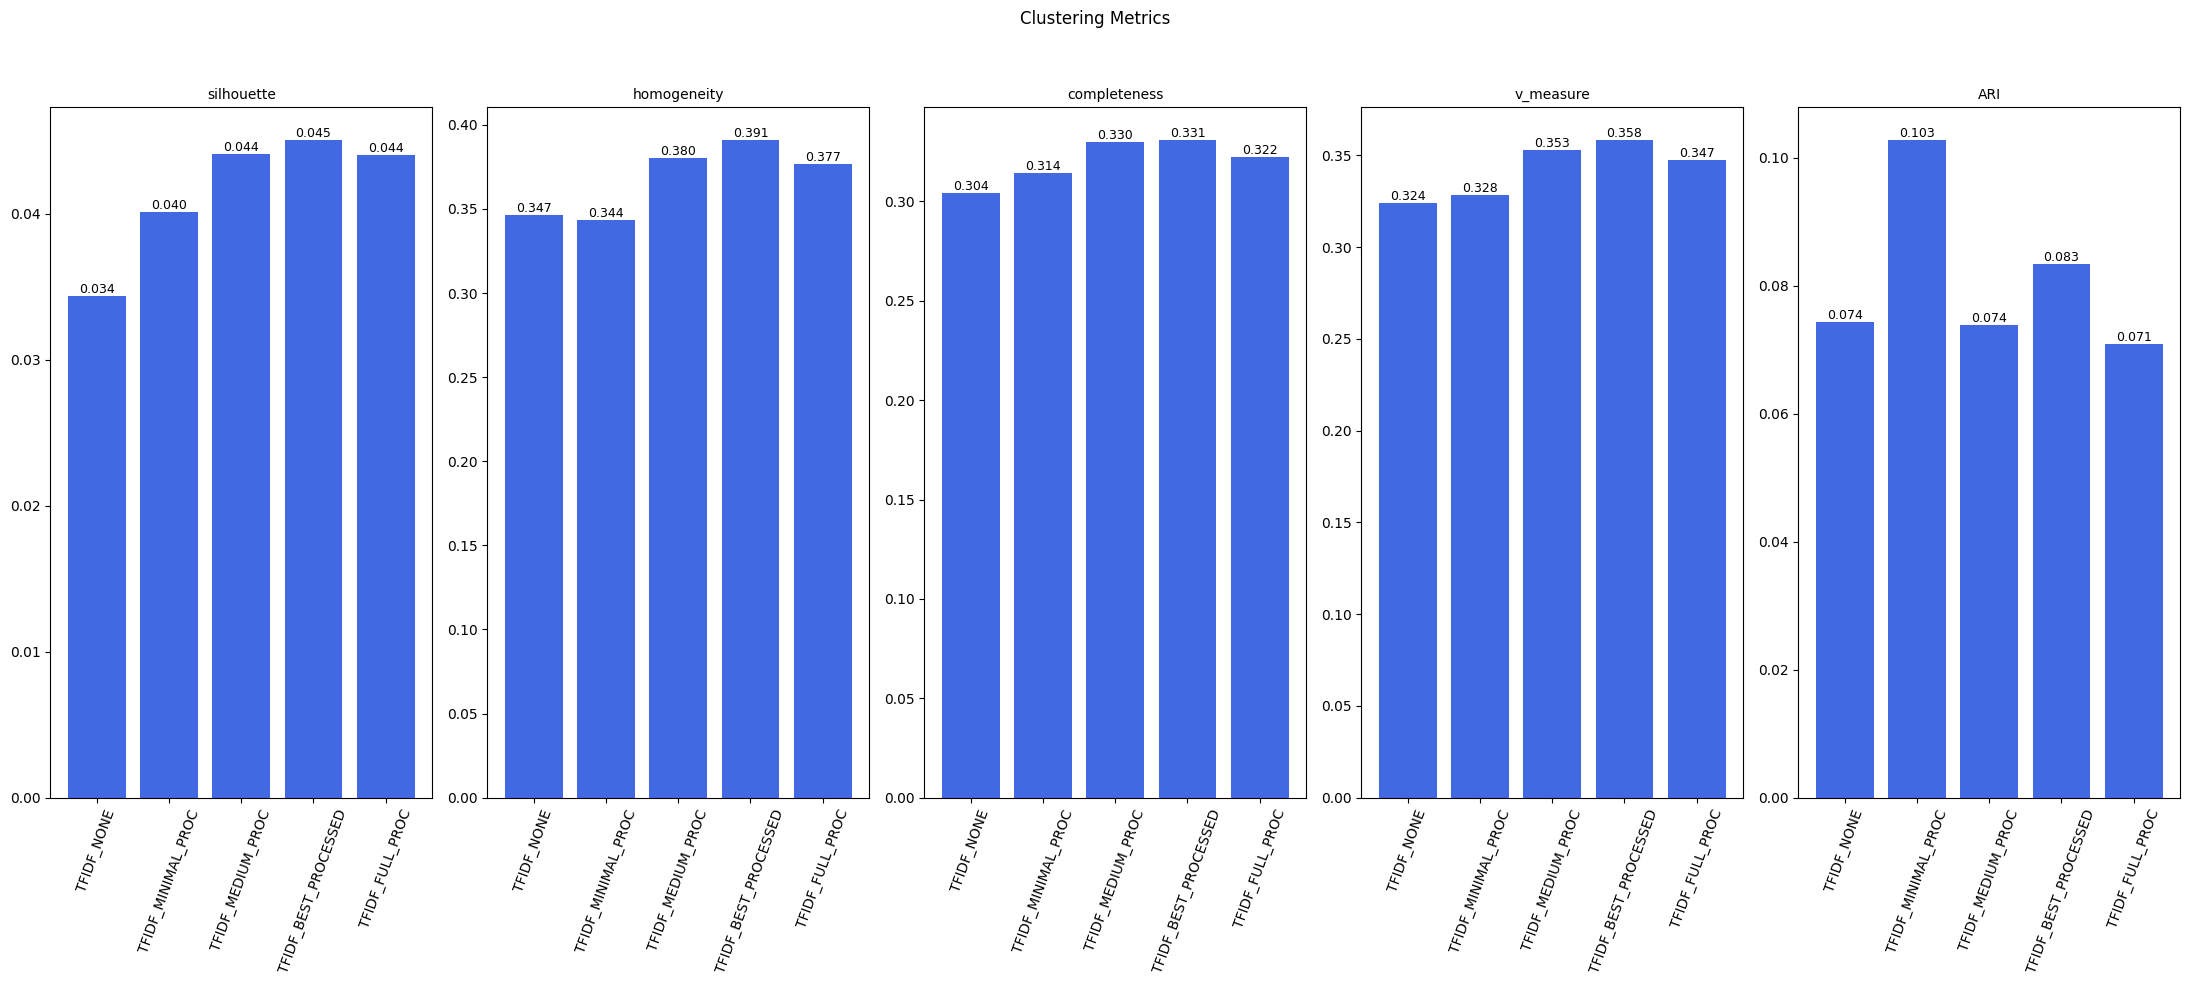

In [24]:
results_TFIDF_k40 = results_all[results_all["K"] == 40].copy()
plot_metrics_bar(results_TFIDF_k40)


#### **Summary of  Metric comparison**

- Overall, the configuration ("enable": True, "lowercase": True, "lemmatize": True, "remove_stopwords": True, "remove_numbers": False,  "keep_short_tokens": False, "remove_medical_boilerplate": False,) achieved the best balance between interpretability and clustering quality.

In [25]:
# Select manually the best 
X_best = X_med2
vec_best = vec_med2
res_best=res_med2

In [26]:
# -------------------------------------
# 7. Top terms per cluster
# -------------------------------------
from utils.task1_utils import top_terms_per_cluster

top_terms = top_terms_per_cluster(X_best, df["cluster"], vec_best, n_terms=10)
top_terms


{0: array(['normal', 'mass', 'bilaterally', 'negative', 'clear', 'tenderness',
        'equal', 'intact', 'nose', 'ear'], dtype=object),
 1: array(['artery', 'coronary', 'coronary artery', 'catheter', 'right',
        'right coronary', 'leave', 'stenosis', 'french', 'left'],
       dtype=object),
 2: array(['history', 'patient', 'past', 'pain', 'normal', 'deny', 'medical',
        'family', 'allergy', 'blood'], dtype=object),
 3: array(['hernia', 'inguinal', 'testis', 'sac', 'procedure', 'penis',
        'foreskin', 'suture', 'cord', 'external oblique'], dtype=object),
 4: array(['l5', 'l4', 'l5 s1', 's1', 'l4 l5', 'root', 'nerve root', 'disc',
        'disk', 'lumbar'], dtype=object),
 5: array(['eye', 'right eye', 'chamber', 'lens', 'anterior chamber',
        'cataract', 'intraocular', 'anterior', 'speculum', 'capsular'],
       dtype=object),
 6: array(['nasal', 'tonsil', 'adenoid', 'tube', 'ear', 'patient', 'place',
        'otitis medium', 'procedure', 'otitis'], dtype=object),
 

#### **Summary of Top Terms Interpretation**

Some top contributing tokens are relevant to a specific class.

For example: 

    wound, tissue, fracture, tumor → Surgery 
    foot, tendon, osteotomy → Podiatry 
    colon, polyp, colonoscopy → Gastroenterology


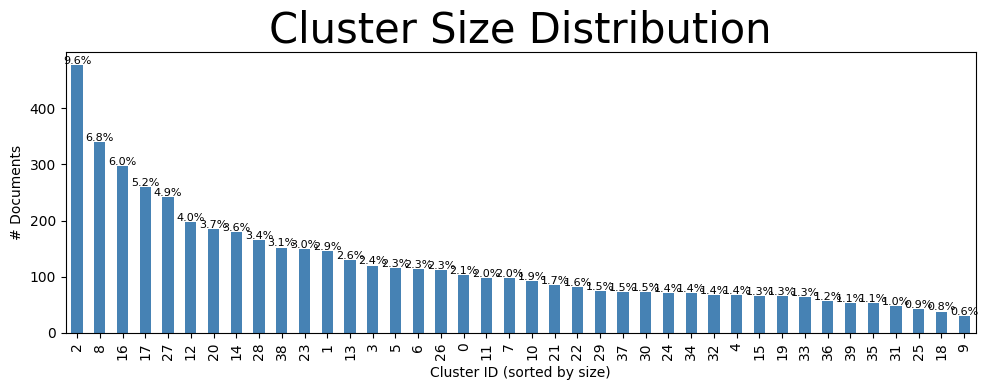

In [27]:
# -------------------------------------
# 8. Cluster size distribution
# -------------------------------------
from utils.task1_utils import plot_cluster_sizes
plot_cluster_sizes(df)


#### **Summary of Clustering Sizes Analysis**

- The dataset is **highly imbalanced**, with a few specialties like "Surgery" and "Consult – History and Phy." dominating the samples, see statistics in **part 1**.

- The clustering results mirror this imbalance — a few large clusters capture most documents, while many small clusters contain very few.

- This suggests that the clustering may reflect the overall data distribution but lacks fine-grained separation among smaller medical specialties.

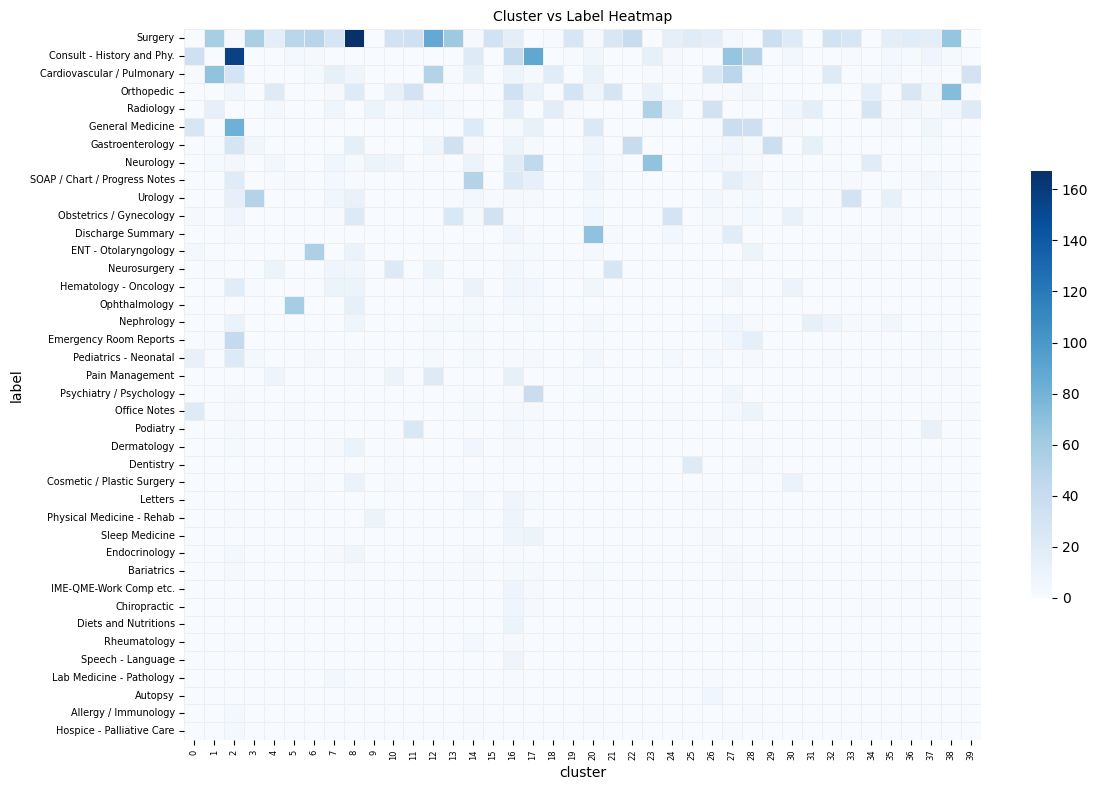

In [28]:
# -------------------------------------
# 9. Crosstab heatmap
# -------------------------------------
from utils.task1_utils import plot_crosstab
plot_crosstab(df,figsize=(12,8))


#### **Summary of Compare Label vs. Cluster**

From this heatmap, we can make a few clear observations:

- Cluster–label alignment is weak overall, with most labels spreading across many clusters and vice versa.

- A few strong alignments stand out — for example, Surgery aligns heavily with a single dominant cluster (around cluster 0), and Consult – History and Phy. has another distinct concentration (around cluster 24).

- Row-wise observation checks how each label maps to clusters. Good examples are: 
    -  **Ophthalmology**, has **only one cluster** dominant, where the top terms are 'eye', 'chamber', 'lens', 'cataract', 'intraocular', 'speculum', etc.
    -  **Podiatry**, has **only one cluster** dominant, where the top terms are 'foot', 'metatarsal', 'tendon', 'plantar','ankle', etc. 
    -  **ENT**, has **only one cluster** dominant, where the top terms are 'ear', 'tube', 'otitis', 'nasal', 'myringotomy', 'middle ear', 'tympanic' etc.

In short, the model differentiates major document types but still mixes many similar or overlapping specialties.

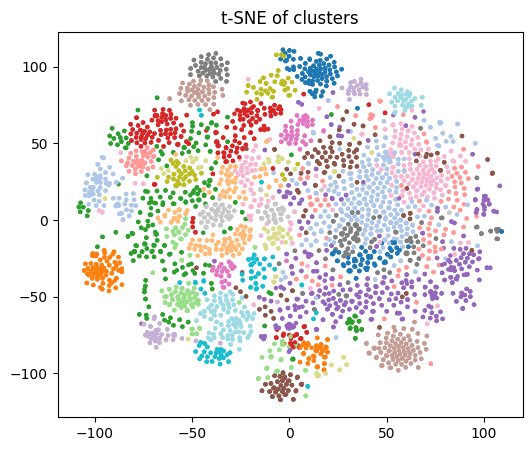

In [29]:
# -------------------------------------
# 10. t-SNE visualization
# -------------------------------------
from utils.task1_utils import plot_tsne
plot_tsne(X_best, df["cluster"])

#### **Summary of 2D Visualization**

- This t-SNE plot shows several compact, well-separated clusters alongside a large mixed central region. The tight color groups suggest that some document types (e.g., specific procedures) are clearly distinguishable.

- However, the overlapping center indicates that many notes share common vocabulary and are harder to separate.

- Overall, the clustering captures partial thematic structure but not full category separation — consistent with the silhouette score.

## Part 3: Further exploration- Class Imbalance Handling

Use sample weighting to handle class imbalance (minority classes get higher weights in evaluation).

In [30]:
from sklearn.utils.class_weight import compute_class_weight
# Analyze imbalance
class_counts = df['label'].value_counts()
print("=" * 70)
print("Class Imbalance Analysis")
print("=" * 70)
print(f"Total classes:     {df['label'].nunique()}")
print(f"Largest class:     {class_counts.max()} samples")
print(f"Smallest class:    {class_counts.min()} samples")
print(f"Imbalance ratio:   {class_counts.max() / class_counts.min():.2f}:1")
print(f"Mean samples:      {class_counts.mean():.1f}")
print("=" * 70)

# Compute sample weights
unique_classes = df['label'].unique()

class_weights = compute_class_weight(
    'balanced',
    classes=unique_classes,
    y=df['label']
)

weight_dict = dict(zip(unique_classes, class_weights))
sample_weights = df['label'].map(weight_dict).values

print("\nSample Weights Computed")
print("-" * 70)
print(f"Min weight: {sample_weights.min():.3f}")
print(f"Max weight: {sample_weights.max():.3f}")
print(f"Weight ratio: {sample_weights.max() / sample_weights.min():.2f}:1")
print("-" * 70)

df['sample_weight'] = sample_weights

print("\nSample weight examples (first 5):")
print(df[['label', 'sample_weight']].head())



Class Imbalance Analysis
Total classes:     40
Largest class:     1087 samples
Smallest class:    6 samples
Imbalance ratio:   181.17:1
Mean samples:      123.8

Sample Weights Computed
----------------------------------------------------------------------
Min weight: 0.114
Max weight: 20.625
Weight ratio: 181.17:1
----------------------------------------------------------------------

Sample weight examples (first 5):
                           label  sample_weight
0               Gastroenterology       0.554933
1                        Surgery       0.113845
2                      Radiology       0.454963
3                        Surgery       0.113845
4  SOAP / Chart / Progress Notes       0.750000


In [31]:
# -------------------------------------
# Weighted KMeans clustering and evaluation
# -------------------------------------

K_true = df["label"].nunique()
interval = 10
Ks = [K_true - interval, K_true, K_true + interval]

def run_kmeans_weighted(X, sample_weight=None):
    results = []
    for K in tqdm(Ks, desc="Running Weighted KMeans"):
        km = KMeans(n_clusters=K, n_init=10, random_state=42)

        km.fit(X, sample_weight=sample_weight)  # Key changes here
        labels = km.labels_                     # extract labels

        sil = silhouette_score(X, labels)
        h, c, v = homogeneity_completeness_v_measure(df["label"], labels)
        ari = adjusted_rand_score(df["label"], labels)

        results.append({
            "K": K,
            "silhouette": sil,
            "homogeneity": h,
            "completeness": c,
            "v_measure": v,
            "ARI": ari
        })

        if K == K_true:
            df["cluster"] = labels # The weighted KMEANS on processed data

    return pd.DataFrame(results)


res_none_weighted = run_kmeans_weighted(
    X_none,
    sample_weight=df["sample_weight"].values
)

res_weighted = run_kmeans_weighted(
    X_best,
    sample_weight=df["sample_weight"].values
)

res_none_weighted["config"] = "TFIDF_NONE_WEIGHTED"

res_weighted["config"]  = "TFIDF_PROCESSED_WEIGHTED"


results_all = pd.concat([res_none, res_best,res_none_weighted, res_weighted], ignore_index=True) 
results_all



Running Weighted KMeans:   0%|          | 0/3 [00:00<?, ?it/s]

Running Weighted KMeans: 100%|██████████| 3/3 [00:27<00:00,  9.01s/it]


,K,silhouette,homogeneity,completeness,v_measure,ARI,config
0,30,0.032562,0.318478,0.310960,0.314674,0.111147,TFIDF_NONE
1,40,0.034346,0.346550,0.304422,0.324123,0.074315,TFIDF_NONE
2,50,0.035797,0.369000,0.295223,0.328014,0.070210,TFIDF_NONE
3,30,0.038383,0.340825,0.331099,0.335891,0.087113,TFIDF_BEST_PROCESSED
4,40,0.045041,0.390890,0.330751,0.358315,0.083424,TFIDF_BEST_PROCESSED
5,50,0.045890,0.408722,0.330427,0.365428,0.078983,TFIDF_BEST_PROCESSED
6,30,0.004250,0.265486,0.340208,0.298238,0.167153,TFIDF_NONE_WEIGHTED
7,40,0.009392,0.294611,0.325015,0.309067,0.140933,TFIDF_NONE_WEIGHTED
8,50,0.004921,0.302919,0.336175,0.318682,0.194445,TFIDF_NONE_WEIGHTED
9,30,0.018067,0.305151,0.400142,0.346250,0.199556,TFIDF_PROCESSED_WEIGHTED


In [32]:
import os

save_dir = "Task1/results"
os.makedirs(save_dir, exist_ok=True)

save_path = os.path.join(save_dir, "results_2.csv")
results_all.to_csv(save_path, index=False)

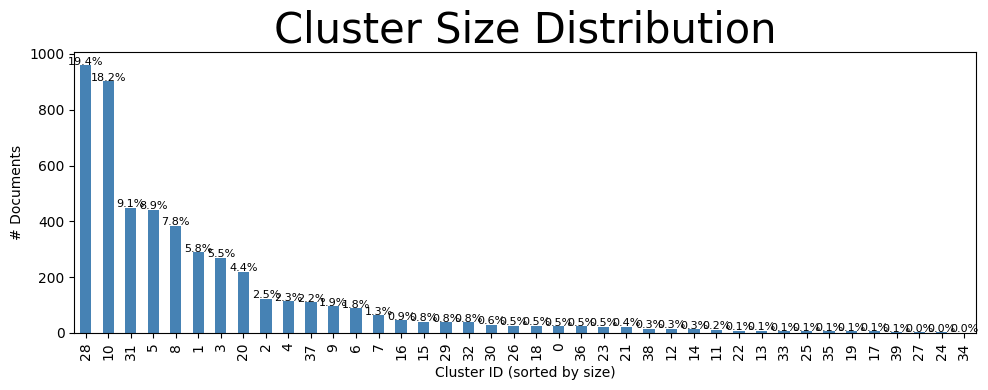

In [33]:
# -------------------------------------
# 8. Cluster size distribution
# -------------------------------------
from utils.task1_utils import plot_cluster_sizes
plot_cluster_sizes(df)


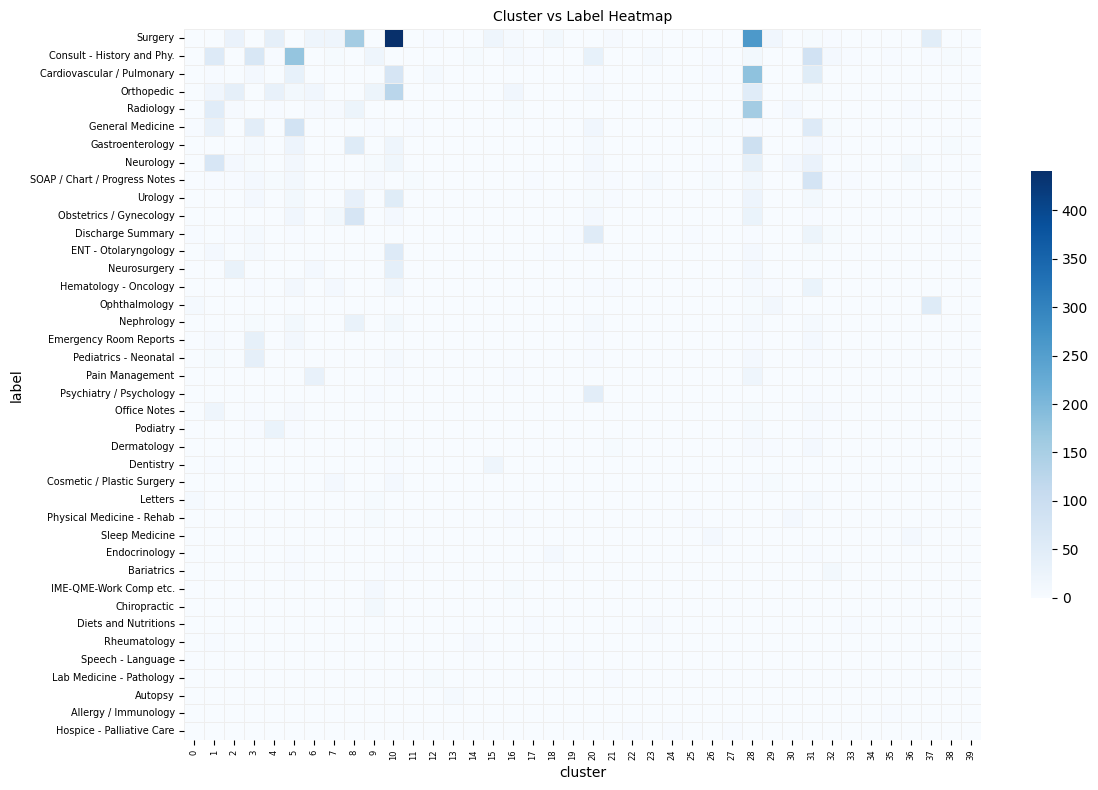

In [34]:
# -------------------------------------
# 9. Crosstab heatmap
# -------------------------------------
from utils.task1_utils import plot_crosstab
plot_crosstab(df,figsize=(12,8))

## Sentence-level Embeddings

- Using processed text for embedding
- Dense vector dim: 384 or 768

In [35]:
from sentence_transformers import SentenceTransformer

# Sentence Embedding Model Loading
print("Loading sentence embedding model...")
model = SentenceTransformer("all-mpnet-base-v2")  # "all-mpnet-base-v2" or "all-MiniLM-L6-v2"


/storage/homefs/kw24z021/miniconda3/envs/task3-nlp/lib/python3.10/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


Loading sentence embedding model...


/storage/homefs/kw24z021/miniconda3/envs/task3-nlp/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/storage/homefs/kw24z021/miniconda3/envs/task3-nlp/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [36]:
print("Encoding sentences into embeddings...")

embeddings_med = model.encode(
    df["text_med"].tolist(),
    show_progress_bar=True,
    convert_to_numpy=True,
    batch_size=32
)

embeddings_med.shape

Encoding sentences into embeddings...


Batches: 100%|██████████| 155/155 [00:24<00:00,  6.36it/s]


(4950, 768)

### Clustering on embedding vectors

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure, adjusted_rand_score

def run_embedding_clustering(X):
    results = []
    for K in Ks:  # same Ks = [K_true-10, K_true, K_true+10]
        km = KMeans(n_clusters=K, n_init=10, random_state=42)
        labels = km.fit_predict(X)

        sil = silhouette_score(X, labels)
        h, c, v = homogeneity_completeness_v_measure(df["label"], labels)
        ari = adjusted_rand_score(df["label"], labels)

        results.append({
            "K": K,
            "silhouette": sil,
            "homogeneity": h,
            "completeness": c,
            "v_measure": v,
            "ARI": ari
        })
        
        if K == K_true:
            df[f"cluster_embedding"] = labels

    return pd.DataFrame(results)

res_sentence_med = run_embedding_clustering(embeddings_med)
res_sentence_med["config"] = "SEMANTIC_EMBEDDING_PROCESSED"
res_sentence_med


,K,silhouette,homogeneity,completeness,v_measure,ARI,config
0,30,0.095030,0.398546,0.358173,0.377282,0.103764,SEMANTIC_EMBEDDING_PROCESSED
1,40,0.101771,0.422141,0.349880,0.382629,0.089630,SEMANTIC_EMBEDDING_PROCESSED
2,50,0.100053,0.443233,0.344204,0.387491,0.075247,SEMANTIC_EMBEDDING_PROCESSED


In [38]:
print("Encoding non-processed sentences into embeddings...")

embeddings_none = model.encode(
    df["text_none"].tolist(),
    show_progress_bar=True,
    convert_to_numpy=True,
    batch_size=32
)

embeddings_none.shape


Encoding non-processed sentences into embeddings...


Batches: 100%|██████████| 155/155 [00:18<00:00,  8.57it/s]


(4950, 768)

In [39]:

res_sentence_none = run_embedding_clustering(embeddings_none)
res_sentence_none["config"] = "SEMANTIC_EMBEDDING_NONE"
res_sentence_none


,K,silhouette,homogeneity,completeness,v_measure,ARI,config
0,30,0.094110,0.395015,0.352312,0.372444,0.092056,SEMANTIC_EMBEDDING_NONE
1,40,0.102895,0.425351,0.347195,0.382320,0.085727,SEMANTIC_EMBEDDING_NONE
2,50,0.104966,0.432679,0.331450,0.375359,0.070919,SEMANTIC_EMBEDDING_NONE


In [40]:
results_all = pd.concat([res_none, res_best,res_none_weighted, res_weighted, res_sentence_none, res_sentence_med], ignore_index=True)
results_all

,K,silhouette,homogeneity,completeness,v_measure,ARI,config
0,30,0.032562,0.318478,0.310960,0.314674,0.111147,TFIDF_NONE
1,40,0.034346,0.346550,0.304422,0.324123,0.074315,TFIDF_NONE
2,50,0.035797,0.369000,0.295223,0.328014,0.070210,TFIDF_NONE
3,30,0.038383,0.340825,0.331099,0.335891,0.087113,TFIDF_BEST_PROCESSED
4,40,0.045041,0.390890,0.330751,0.358315,0.083424,TFIDF_BEST_PROCESSED
5,50,0.045890,0.408722,0.330427,0.365428,0.078983,TFIDF_BEST_PROCESSED
6,30,0.004250,0.265486,0.340208,0.298238,0.167153,TFIDF_NONE_WEIGHTED
7,40,0.009392,0.294611,0.325015,0.309067,0.140933,TFIDF_NONE_WEIGHTED
8,50,0.004921,0.302919,0.336175,0.318682,0.194445,TFIDF_NONE_WEIGHTED
9,30,0.018067,0.305151,0.400142,0.346250,0.199556,TFIDF_PROCESSED_WEIGHTED


In [41]:
import os

save_dir = "Task1/results"
os.makedirs(save_dir, exist_ok=True)

save_path = os.path.join(save_dir, "results_3.csv")
results_all.to_csv(save_path, index=False)

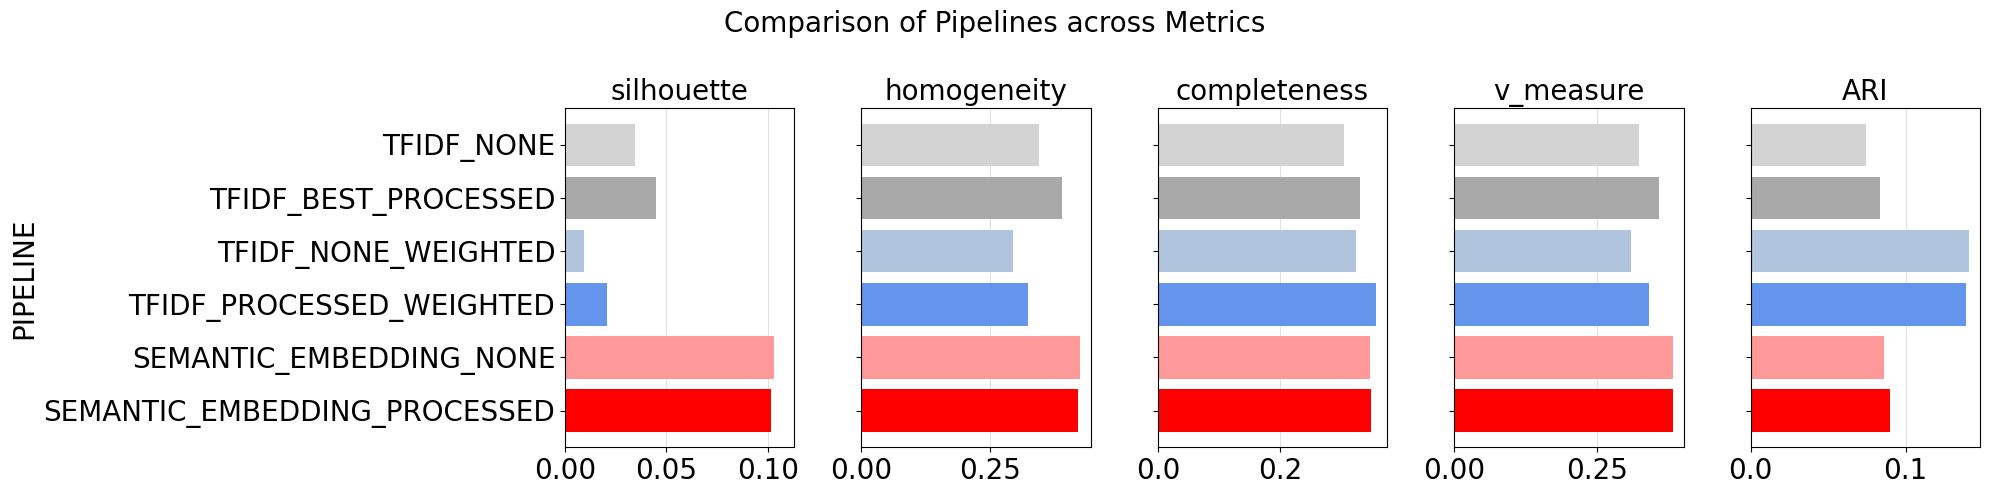

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from utils.task1_utils import plot_metrics_bar_rotated

results_k40 = results_all[results_all["K"] == 40].copy()
plot_metrics_bar_rotated(results_k40)

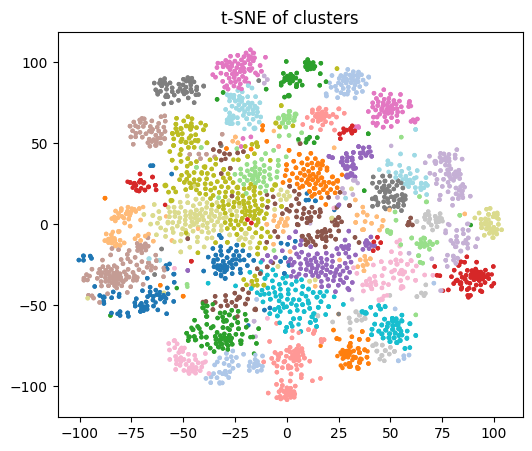

In [43]:
from utils.task1_utils import plot_tsne
plot_tsne(embeddings_none, df["cluster_embedding"])

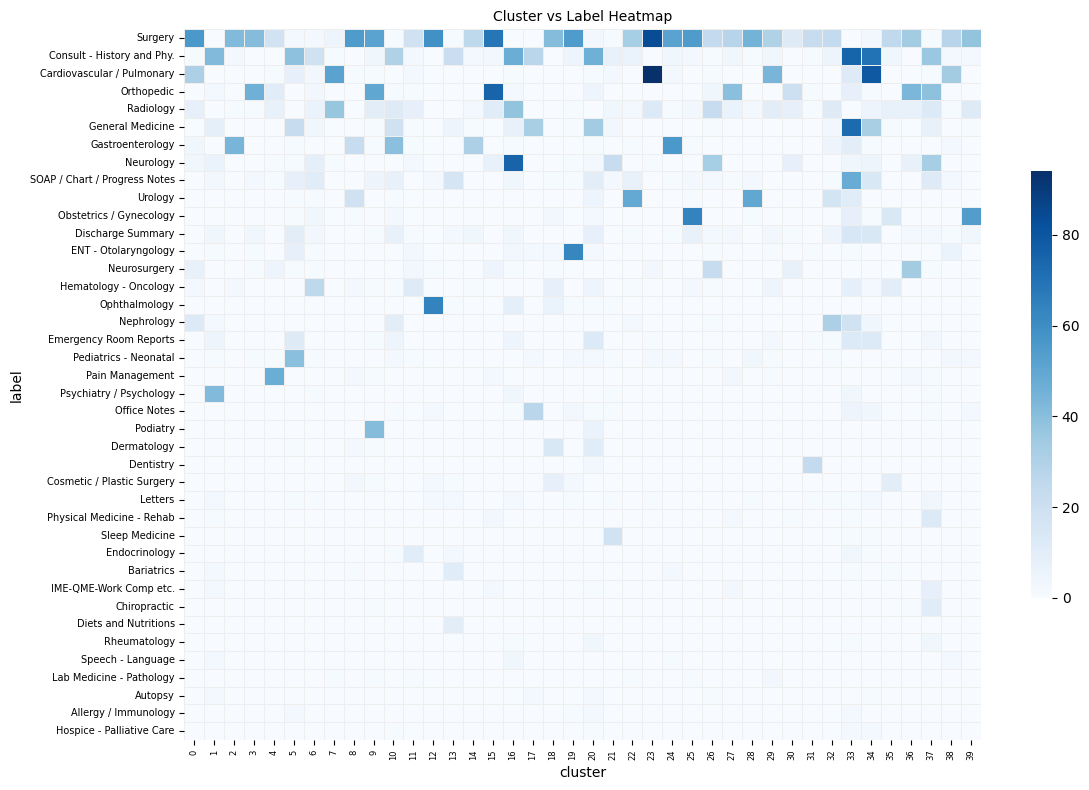

In [44]:
# -------------------------------------
# 9. Crosstab heatmap
# -------------------------------------
from utils.task1_utils import plot_crosstab
df["cluster"] = df["cluster_embedding"]
plot_crosstab(df)